# Nayak, Anil Kumar
# 1001-396-015
# 2017-04-06
# Assignment_04_01

In [46]:
import numpy as np
import operator
import matplotlib.pyplot as plt
import numpy.linalg as eim
import os
import cv2
import scipy.misc as sc

base_path = "Eigenfaces/"
base_path_train = base_path+"Train"
base_path_test = base_path+"Test"
image_size = 425
th = {'2':650,'5':1200,'15':2000}

In [2]:
def read_images(base_path_train):
    original_image = []
    original_image_100 = []
    all_image_names = os.listdir(base_path_train)
    names = []
    for image_name in all_image_names:
        if image_name.split(".")[1]=="db":
            continue

        name = image_name.split("_")[0]

        gray_image = cv2.imread(base_path_train + "/" + image_name,0)
        #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image_r = sc.imresize(gray_image.copy(), (100,100))
        image_int_array = np.asarray(gray_image)
        image_int_array = image_int_array/255

        original_image.append(image_int_array)
        original_image_100.append(image_r)
        names.append(name)
    return original_image,original_image_100,names

In [3]:
def convert_image_matrix(original_image):
    n,w,h = np.shape(original_image)
    image_matrix = []
    for i in range(n):
        image = original_image[i]
        r,c = np.shape(image)
        image_matrix.append(np.transpose(np.reshape(image,r*c)))
    return np.transpose(image_matrix)

In [4]:
def display_images(images,resize):
    fig, axes_array = plt.subplots(5, 5)
    i = 0
    j = 0
    for image in images:
        if resize:
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = sc.imresize(gray_image.copy(), (100, 100))

        image_plot = axes_array[i][j].imshow(image, cmap=plt.cm.gray)
        axes_array[i][j].axis('off')
        j = j + 1
        if j==5:
            i = i + 1
            j = 0
    plt.show()

In [5]:
def display_single_image(image):
    plt.figure()
    plt.imshow(image, cmap=plt.cm.gray)
    plt.show()

In [6]:
def prepare_eigen_face_from_eigen_matrix(Eigen_face_matrix,size):
    eigen_face_array = []
    size_mat = np.shape(Eigen_face_matrix)[1]
    for i in range(size_mat):
        face = Eigen_face_matrix[:,i]
        eigen_face = np.transpose(np.reshape(face, (size, -1), order='F'))
        #face_nor = (255 * (eigen_face - min_val) / max_val - min_val)
        eigen_face_array.append(eigen_face)
    return eigen_face_array

In [7]:
def prepare_zero_mean_matrix(image_matrix,mean_vector_of_data_matrix):
    zero_mean_matrix = np.transpose(np.transpose(image_matrix) - np.transpose(mean_vector_of_data_matrix))

    return zero_mean_matrix

In [8]:
def prepare_dictionary_Eigen_value_vector(Eigen_values, Eigen_vectors):
    size = np.shape(Eigen_values)[0]
    dictionary = []
    for i in range(size):
        dict = {}
        value = Eigen_values[i]
        vector = Eigen_vectors[i]
        dict['EValue'] = value
        dict['EVector'] = vector
        dictionary.append(dict)
    return dictionary

In [32]:
def display_test_images(testing_images,resize,threshold):
    size = len(testing_images)

    for i in range(size):
        k = testing_images[i]['k']
        all_images = testing_images[i]['testing_dict']
        size1 = len(all_images)
            
        print('Image Recognition for K = ',k)
        thr = threshold[str(k)]
        
        for j in range(size1):
            images = all_images[j]
            train_img = images['train_image']
            test_img = images['test_img']
            min_dist = images['distance']

            #gray_image_tr = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
            #gray_image_ts = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
            
            print("Distance : ",min_dist)
            
            if min_dist<=thr:
                fig, axes_array = plt.subplots(1, 2)
                image_ts = sc.imresize(test_img.copy(), (100,100))
                image_plot = axes_array[0].imshow(image_ts, cmap=plt.cm.gray)
                axes_array[0].axis('off')
            
                image_tr = sc.imresize(train_img.copy(), (100,100))
                image_plot = axes_array[1].imshow(image_tr, cmap=plt.cm.gray)
                axes_array[1].axis('off')
                plt.show()
            else:
                #fig, axes_array = plt.subplots(1, 1)
                image_ts = sc.imresize(test_img.copy(), (100,100))
                plt.imshow(image_ts, cmap=plt.cm.gray)
                plt.axis('off')
                plt.show()
            
            
            #name = str(k)+"_"+str(min_dist)+"_"+str(i)+"_"+str(j)+"_train_img.jpg"
            #cv2.imwrite(name, train_img)

            #name = str(k)+"_"+str(min_dist)+"_"+str(i)+"_"+str(j) +  "_test_img.jpg"
            #cv2.imwrite(name, test_img)


In [10]:
def reconstruct_image(number_of_eigen_vector,eigen_vector_dict,zero_mean_image_matrix,image_size,display,mean_vector_of_data_matrix):
    dictionary_eigen_vector = []
    for k in number_of_eigen_vector:
        dict = {}
        dict['k'] = k

        #print("Top ", k, " Eigen Face and Reconstruction of Image")
        eigen_vector_selected = []
        count = 0
        top_eigen_vector = eigen_vector_dict[0:k]
        for i in range(k):
            dict_eigen_vec = top_eigen_vector[i]
            eigen_vec = dict_eigen_vec['EVector']
            eigen_vector_selected.append(eigen_vec)

        eigen_vector_selected = np.transpose(eigen_vector_selected)
        #print(eigen_vector_selected[1,:])
        eigen_faces = np.dot(zero_mean_image_matrix, eigen_vector_selected)
        eigen_faces = np.transpose(eigen_faces)
        #print(eigen_faces)
        dict['eigen_faces'] = eigen_faces
        coefficient = np.dot(eigen_faces, zero_mean_image_matrix)
        coefficient = np.transpose(coefficient)
        dict['coefficient'] = coefficient

        reconstructed_image = np.dot(coefficient, eigen_faces)
        reconstructed_image = reconstructed_image/np.max(reconstructed_image)
        #print("reconstructed_image shape",np.shape(reconstructed_image))
        #print("mean_vector_of_data_matrix shape", np.shape(mean_vector_of_data_matrix))

        reconstructed_image = reconstructed_image + np.transpose(mean_vector_of_data_matrix)
        reconstructed_image = np.transpose(reconstructed_image)

        reconstruct_images = prepare_eigen_face_from_eigen_matrix(reconstructed_image, image_size)

        if display:
            display_images(reconstruct_images, False)

        dictionary_eigen_vector.append(dict)

    return dictionary_eigen_vector

In [11]:
def classify_images(dictionary_eigen_vector, test_zero_mean_image_matrix, original_image_100, test_image_100,training_names, testing_names):
    total_k_test_image = []

    for dict in dictionary_eigen_vector:
        k = dict['k']
        #print("Testing Images for Eigen Faces ", k)
        eigen_faces = dict['eigen_faces']
        coefficients = dict['coefficient']
        # print(eigen_faces)
        # print(coefficients)
        # print("==========================")
        coefficient_test = np.dot(eigen_faces, test_zero_mean_image_matrix)  # 2 x 32   coefficients 2 x 25
        coefficient_test = np.transpose(coefficient_test)

        size_test_coef = np.shape(coefficient_test)[0]
        size_train_coef = np.shape(coefficients)[0]
        testing_dict = []
        th_value = 9999999999999999999999999
        for i in range(size_test_coef):
            coef_ts = coefficient_test[i]

            dict = {}
            min_dist = 9999999999
            position = -1
            #print("============Test Image ",i,"=============")
            #print(coef_ts)
            count = 0
            for j in range(size_train_coef):
                # print("============Train Image ", j, "=============")
                coef_tr = coefficients[j]
                #print(coef_tr)
                diff_vec = (coef_tr - coef_ts)
                # print(diff_vec)
                # print(np.transpose(diff_vec))
                e = np.square(diff_vec)
                f = np.sum(e)
                value = np.sqrt(f)
                # print(value)

                if count == 0:
                    min_dist = value
                    position = j
                    count = count + 1
                else:
                    if value < min_dist:
                        min_dist = value
                        position = j
                        th = value

            if th_value > min_dist:
                th_value = min_dist
            #if k==5:
            #    print(test_name + " : "+ str(min_dist))

            train_img = original_image_100[position]
            test_img = test_image_100[i]
            train_name = training_names[position]
            test_name = testing_names[i]
            dict['train_image'] = train_img
            dict['test_img'] = test_img
            dict['train_name'] = train_name
            dict['test_name'] = test_name
            dict['distance'] = min_dist
            testing_dict.append(dict)
        k_dict = {}
        k_dict['k'] = k
        k_dict['th'] = th_value
        k_dict['testing_dict'] = testing_dict
        total_k_test_image.append(k_dict)
    return total_k_test_image

In [12]:
def calculate_error_rate(total_k_test_images):
    error_dictionary = []
    x = []
    y = []
    for dict_k in total_k_test_images:
        error_dict = {}
        count = 0
        total_count = 0
        k = dict_k['k']
        th_value = dict_k['th']
        testing_dtl = dict_k['testing_dict']

        for dict in testing_dtl:
            train_name = dict['train_name']
            test_name = dict['test_name']
            total_count = total_count + 1

            if train_name!=test_name:
                count = count + 1

        error = count / total_count
        error_dict['k'] = k
        error_dict['error'] = error
        error_dictionary.append(error_dict)
        x.append(k)
        y.append(error)

    return error_dictionary,x,y

In [13]:
def plot_error_vs_k(x,y):
    plt.plot(x, y, marker='o', linestyle='--', color='r', label='Square')
    plt.xlabel('Error Rate')
    plt.ylabel('K')
    plt.title('Classification error rate as a function of k')
    plt.show()

Task 1 is in progress : Eigen Faces Creation has started on Training Data


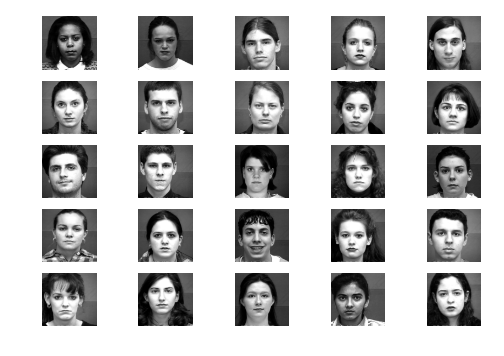

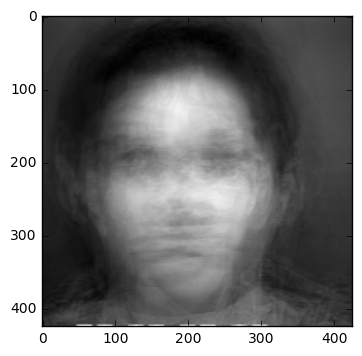

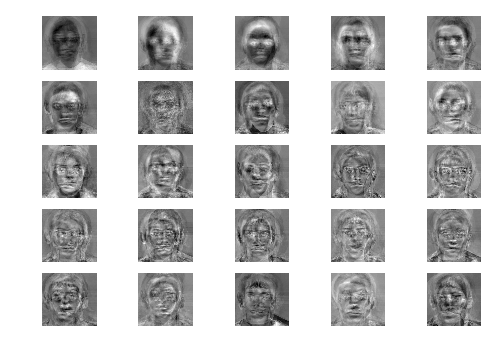

In [14]:
#Task 1
print('Task 1 is in progress : Eigen Faces Creation has started on Training Data')
original_images,original_image_100,training_names = read_images(base_path_train)
number_of_training_image = np.shape(original_images)[0]
image_matrix = convert_image_matrix(original_images)
mean_vector_of_data_matrix = np.mean(image_matrix, axis=1)
zero_mean_image_matrix = np.transpose(np.transpose(image_matrix)-np.transpose(mean_vector_of_data_matrix))
mean_image = np.transpose(np.reshape(mean_vector_of_data_matrix,(image_size,-1),order='F'))
display_images(original_image_100,False)
display_single_image(mean_image)
covariance_matrix = np.cov(zero_mean_image_matrix, rowvar=False)
Eigen_values, Eigen_vectors = eim.eig(covariance_matrix)
#Normalizing the Eigen Vectors
for i in range(25):
    vec = Eigen_vectors[i]
    norm_val = np.sqrt(np.sum(np.square(vec)))
    vec = vec/norm_val
    Eigen_vectors[i] = vec
Eigen_face_matrix = np.dot(zero_mean_image_matrix,Eigen_vectors)
Eigen_faces = prepare_eigen_face_from_eigen_matrix(Eigen_face_matrix,image_size)
display_images(Eigen_faces,False)

In [20]:
#Testing data read for the classification
test_images,test_image_100,testing_names = read_images(base_path_test)
number_of_testing_images = np.shape(test_images)[0]
test_image_matrix = convert_image_matrix(test_images)
test_zero_mean_image_matrix = prepare_zero_mean_matrix(test_image_matrix,mean_vector_of_data_matrix)


Task 2 is in progress : Reconstruction of Original Image for K=2


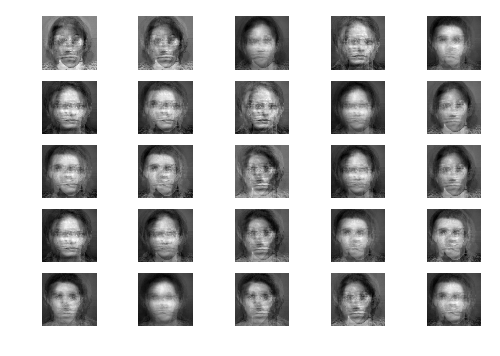

In [21]:
#Task 2
print('Task 2 is in progress : Reconstruction of Original Image for K=2')
#Eigen_values, Eigen_vectors
eigen_vector_dict = prepare_dictionary_Eigen_value_vector(Eigen_values, Eigen_vectors)
eigen_vector_dict.sort(key=operator.itemgetter('EValue'), reverse=True)

number_of_eigen_vector = [2]
dictionary_eigen_vector = reconstruct_image(number_of_eigen_vector,
                                                                     eigen_vector_dict,
                                                                     zero_mean_image_matrix,
                                                                     image_size,
                                                                     True,
                                                                     mean_vector_of_data_matrix)


Task 3 is in progress : Face Recongnition has Started for Testing Images K=2
Image Recognition for K =  2
Distance :  792.510917668


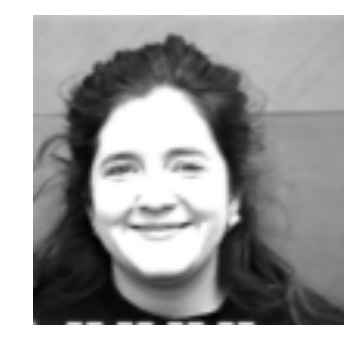

Distance :  501.257204059


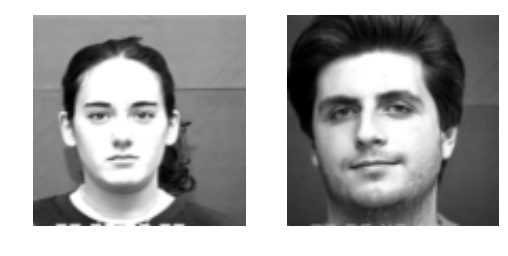

Distance :  829.75732509


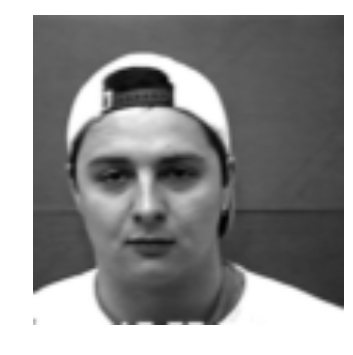

Distance :  1131.14738904


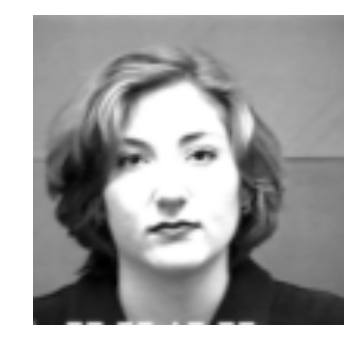

Distance :  106.974132269


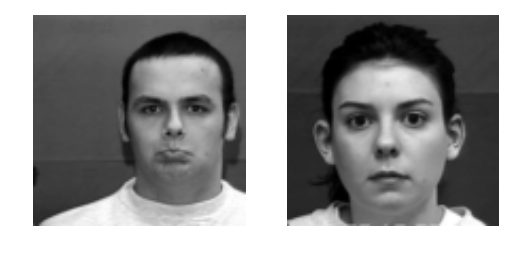

Distance :  448.868905672


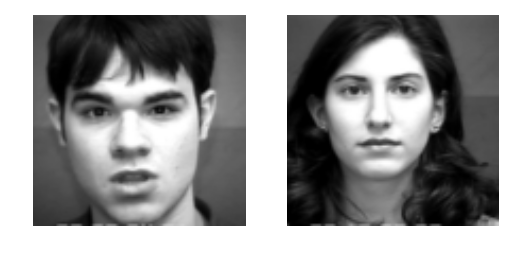

Distance :  63.0134637057


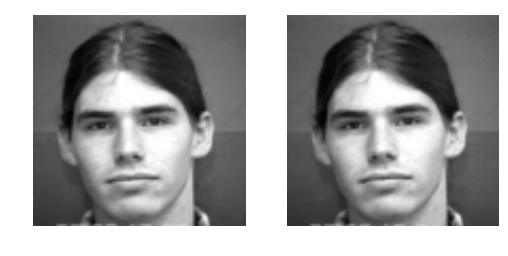

Distance :  538.958761821


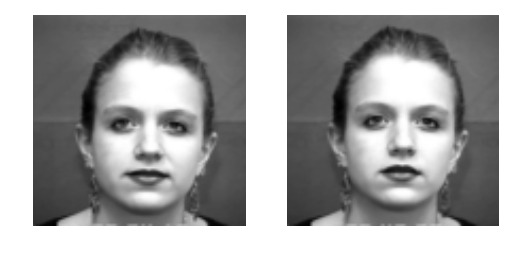

Distance :  14.5077607945


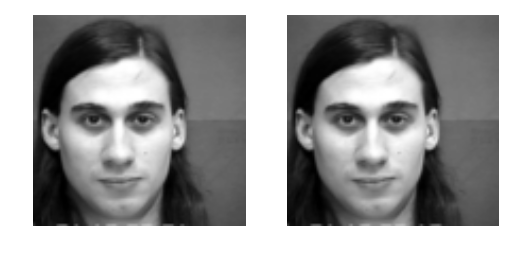

Distance :  524.732378457


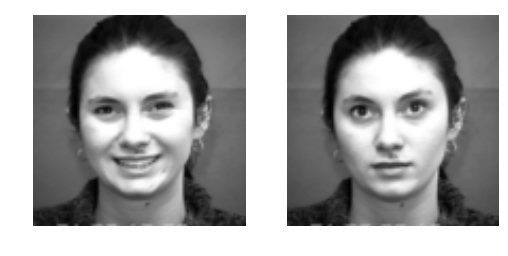

Distance :  480.908973383


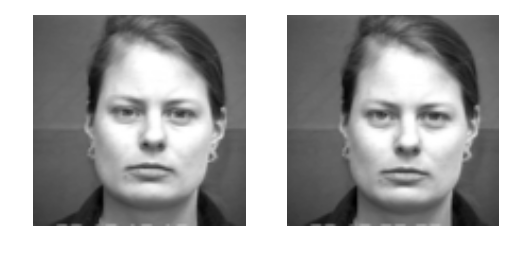

Distance :  327.567667987


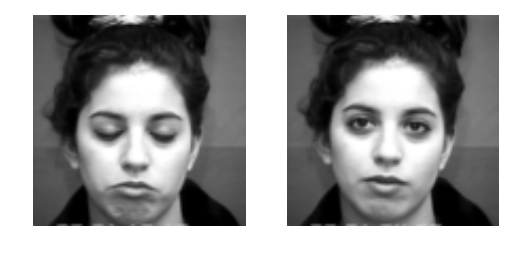

Distance :  762.085537654


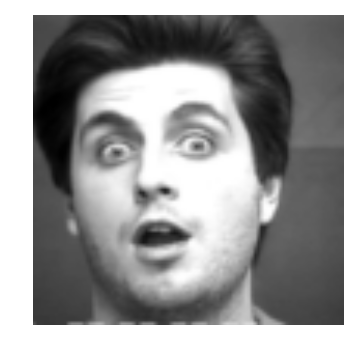

Distance :  692.763063628


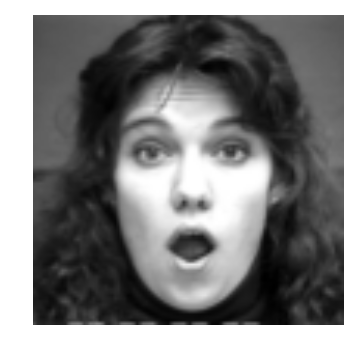

Distance :  339.213503428


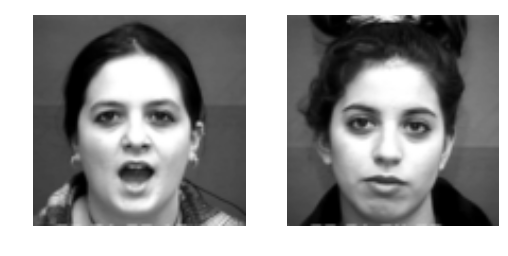

Distance :  322.845648948


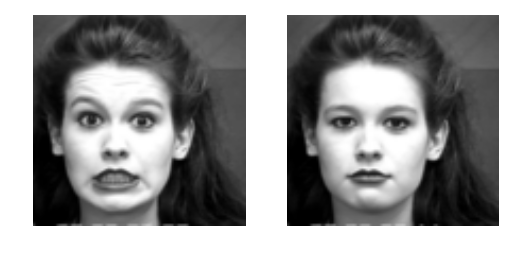

Distance :  96.9600358556


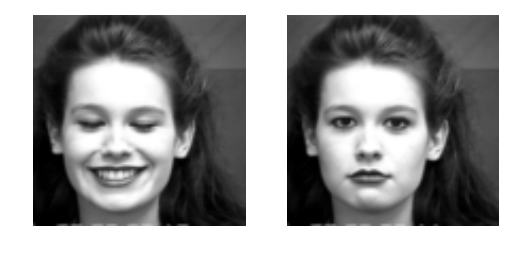

Distance :  680.224212497


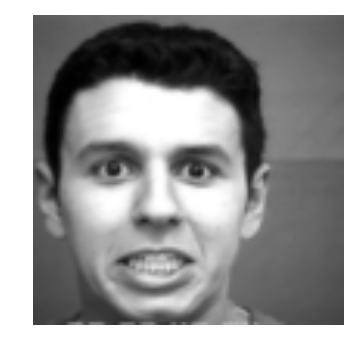

Distance :  514.224370004


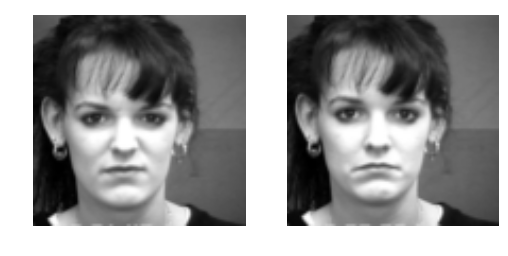

Distance :  533.725870342


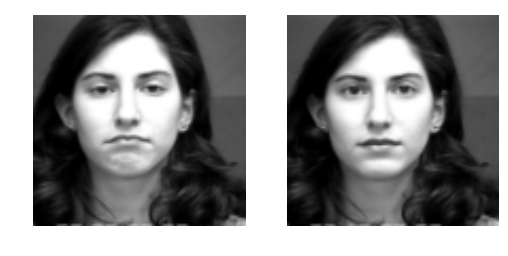

Distance :  348.876243875


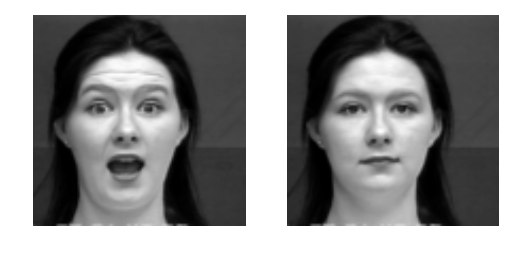

Distance :  354.605745065


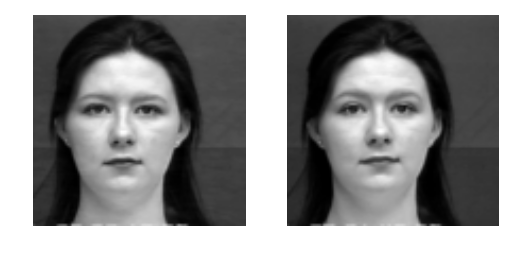

Distance :  1165.18864225


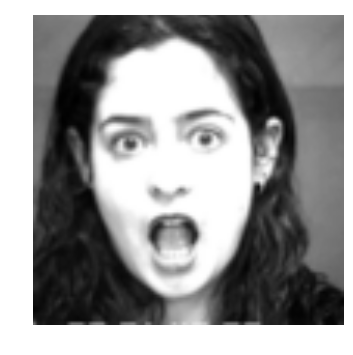

Distance :  773.935942599


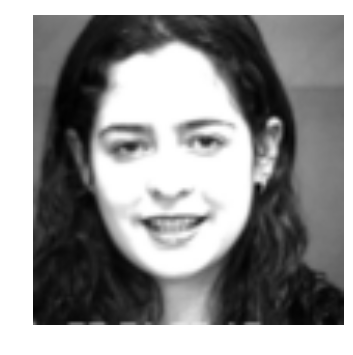

Distance :  1173.86917922


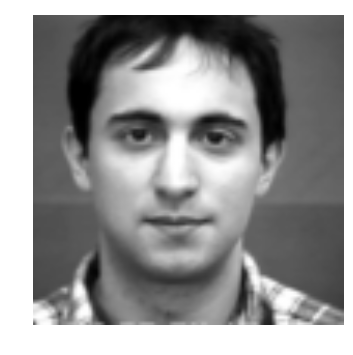

Distance :  493.813932862


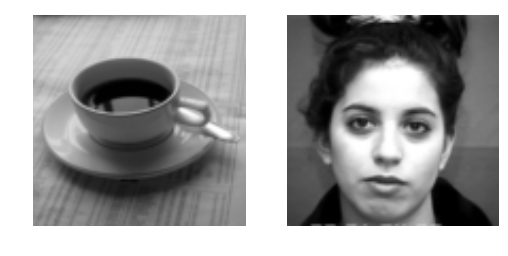

Distance :  365.35362571


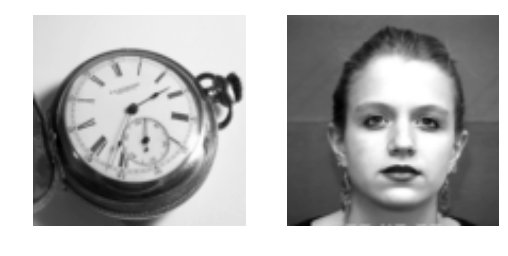

Distance :  664.994186552


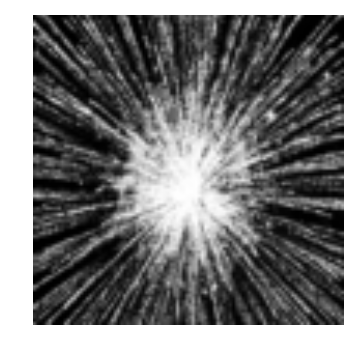

Distance :  1024.45822896


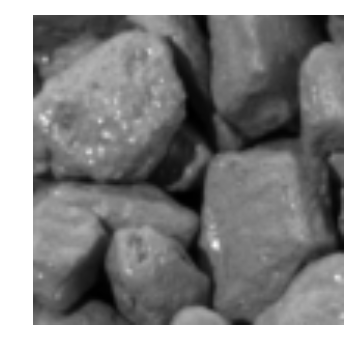

Distance :  1878.61406824


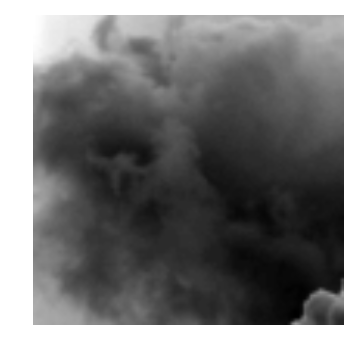

Distance :  815.229999094


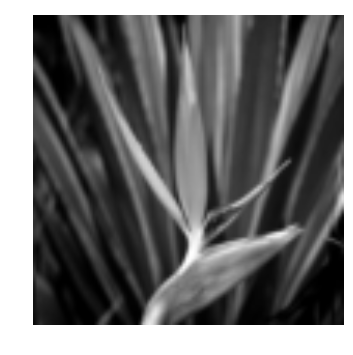

Distance :  1205.50045859


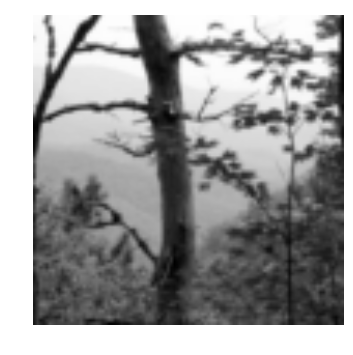

In [38]:
#Task 3
print('Task 3 is in progress : Face Recongnition has Started for Testing Images K=2')
total_k_test_images = classify_images(dictionary_eigen_vector,
                                                               test_zero_mean_image_matrix,
                                                               original_image_100,
                                                               test_image_100,
                                                               training_names,
                                                               testing_names)

display_test_images(total_k_test_images,False,th)

Task 2 is in progress : Reconstruction of Original Image Has Started for K=5


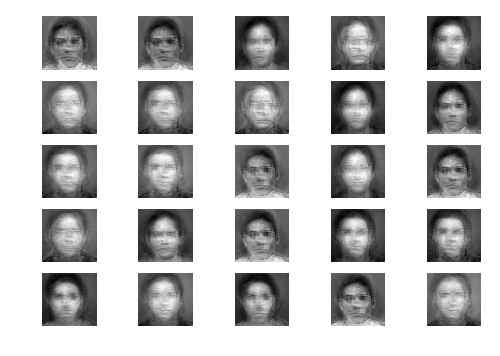

In [44]:
#Task 2
print('Task 2 is in progress : Reconstruction of Original Image Has Started for K=5')
#Eigen_values, Eigen_vectors
eigen_vector_dict = prepare_dictionary_Eigen_value_vector(Eigen_values, Eigen_vectors)
eigen_vector_dict.sort(key=operator.itemgetter('EValue'), reverse=True)

number_of_eigen_vector = [5]
dictionary_eigen_vector = reconstruct_image(number_of_eigen_vector,
                                                                     eigen_vector_dict,
                                                                     zero_mean_image_matrix,
                                                                     image_size,
                                                                     True,
                                                                     mean_vector_of_data_matrix)

Task 3 is in progress : Face Recongnition has Started for Testing Images K=5
Image Recognition for K =  5
Distance :  2495.73464613


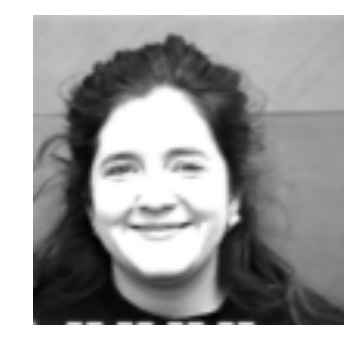

Distance :  2411.64777402


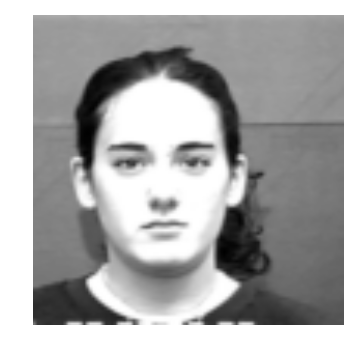

Distance :  4129.90713377


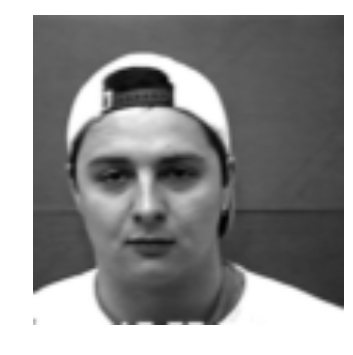

Distance :  2555.16474382


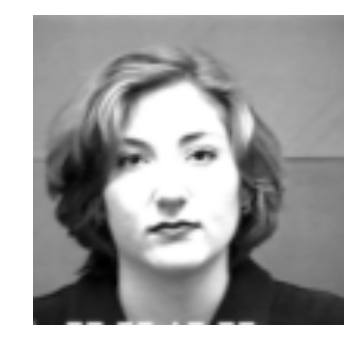

Distance :  2172.68919357


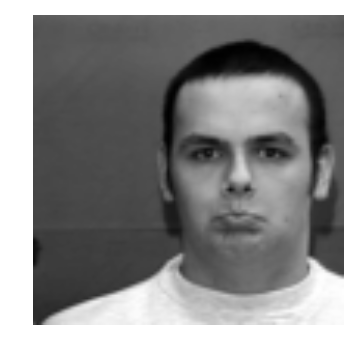

Distance :  1442.39436153


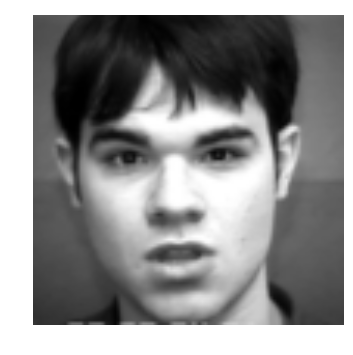

Distance :  95.1498746421


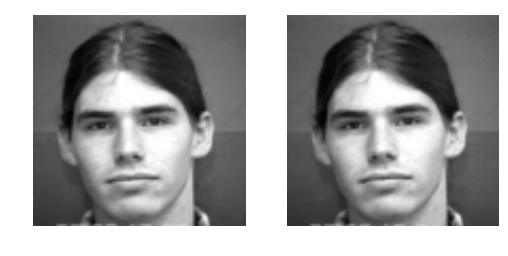

Distance :  819.849042359


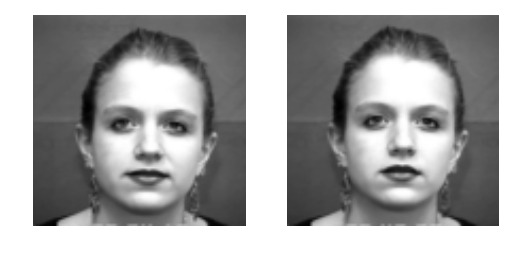

Distance :  48.8889169231


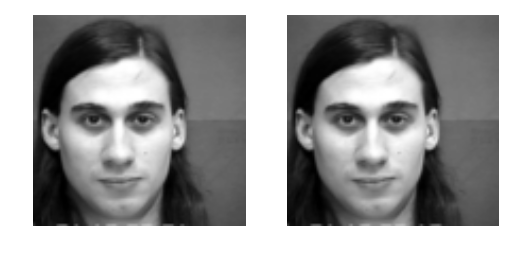

Distance :  603.811854109


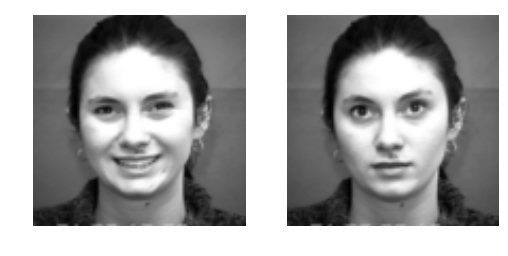

Distance :  884.472889944


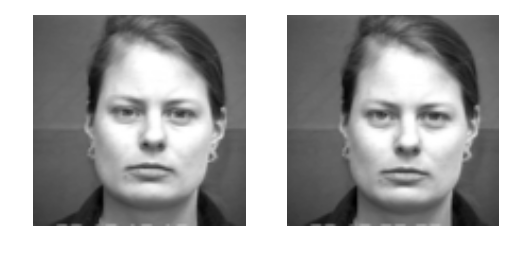

Distance :  418.451353243


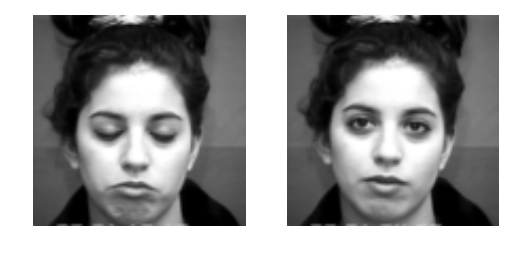

Distance :  2088.91385631


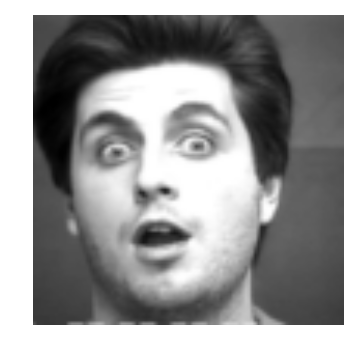

Distance :  1333.70281461


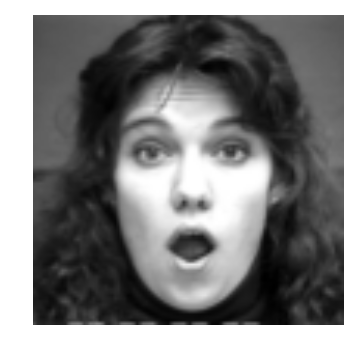

Distance :  1062.67787431


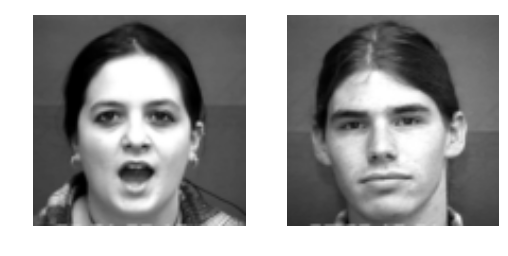

Distance :  484.994511928


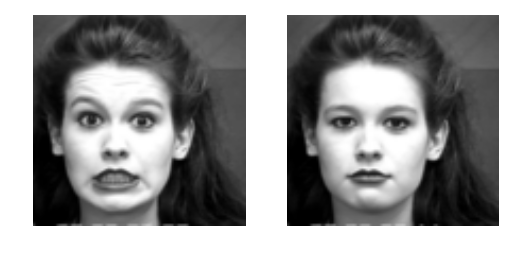

Distance :  379.716786097


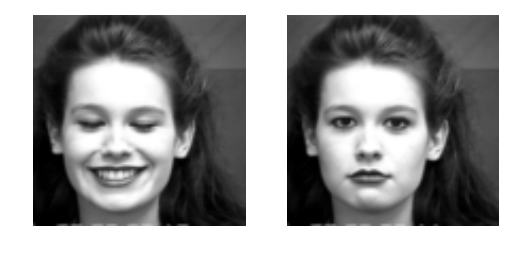

Distance :  1953.62235541


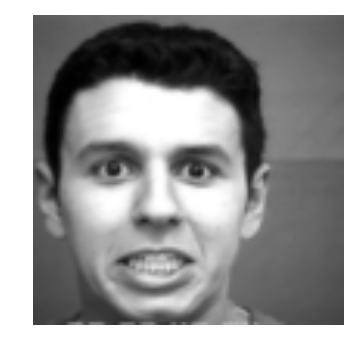

Distance :  1199.45071034


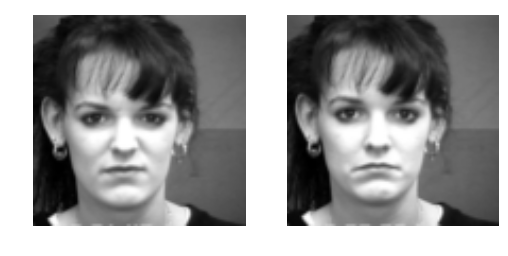

Distance :  706.728200145


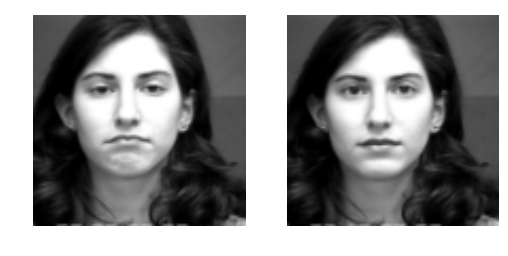

Distance :  369.8642817


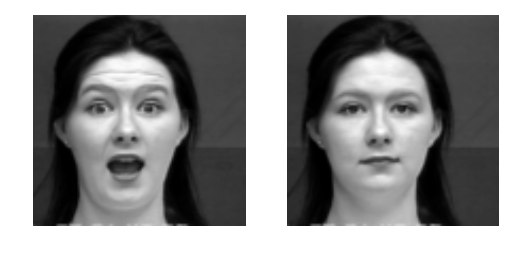

Distance :  590.575689542


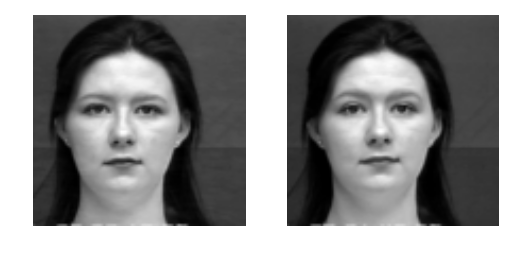

Distance :  3984.70832971


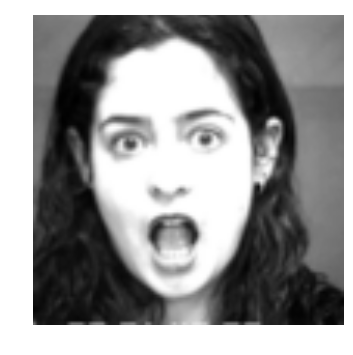

Distance :  3177.04339509


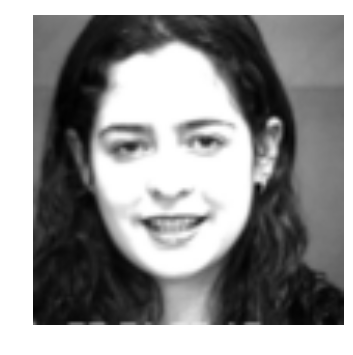

Distance :  2377.07417283


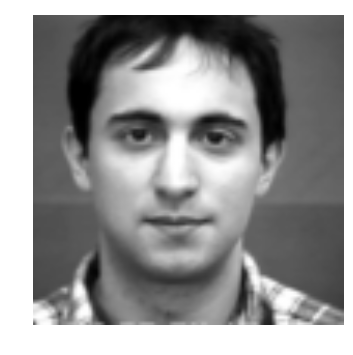

Distance :  3151.98668216


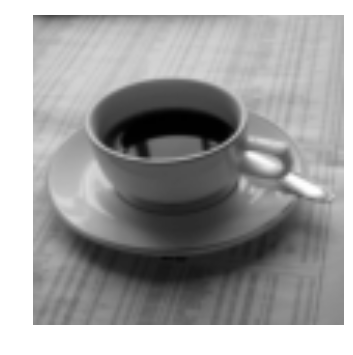

Distance :  4130.63150044


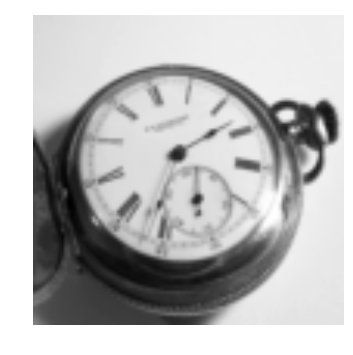

Distance :  2201.53453519


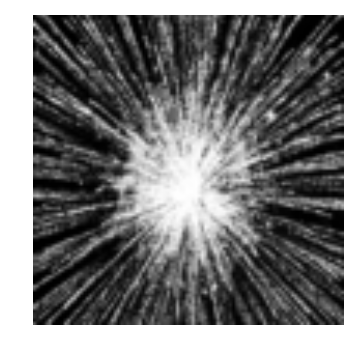

Distance :  3270.38080906


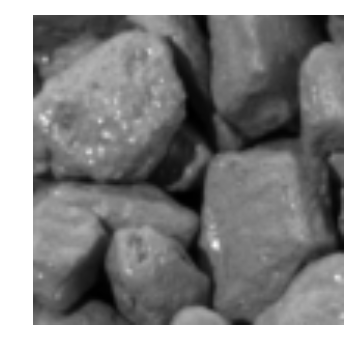

Distance :  3332.47370189


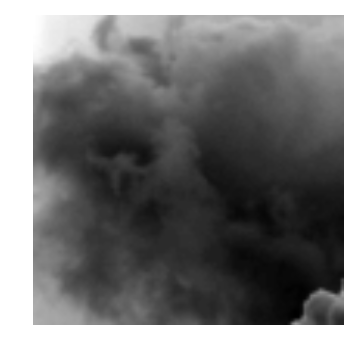

Distance :  3191.56399066


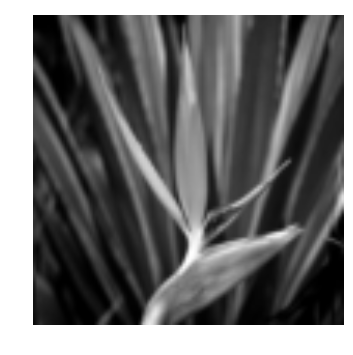

Distance :  1838.12474508


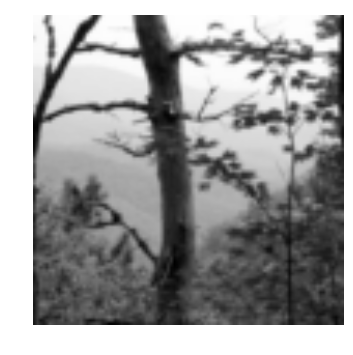

In [47]:
#Task 3
print('Task 3 is in progress : Face Recongnition has Started for Testing Images K=5')
total_k_test_images = classify_images(dictionary_eigen_vector,
                                                               test_zero_mean_image_matrix,
                                                               original_image_100,
                                                               test_image_100,
                                                               training_names,
                                                               testing_names)

display_test_images(total_k_test_images,False,th)

Task 2 is in progress : Reconstruction of Original Image Has Started for k=15


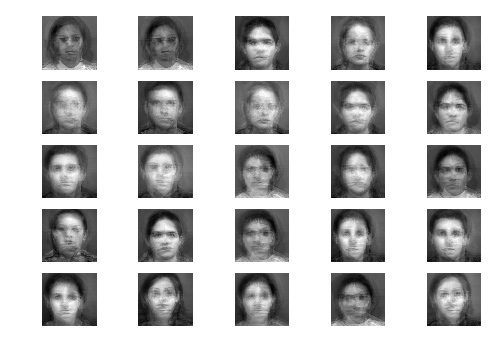

In [48]:
#Task 2
print('Task 2 is in progress : Reconstruction of Original Image Has Started for k=15')
#Eigen_values, Eigen_vectors
eigen_vector_dict = prepare_dictionary_Eigen_value_vector(Eigen_values, Eigen_vectors)
eigen_vector_dict.sort(key=operator.itemgetter('EValue'), reverse=True)

number_of_eigen_vector = [15]
dictionary_eigen_vector = reconstruct_image(number_of_eigen_vector,
                                                                     eigen_vector_dict,
                                                                     zero_mean_image_matrix,
                                                                     image_size,
                                                                     True,
                                                                     mean_vector_of_data_matrix)

Task 3 is in progress : Face Recongnition has Started for Testing Images K=15
Image Recognition for K =  15
Distance :  7871.4524513


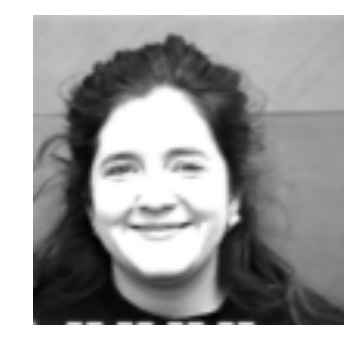

Distance :  7792.33200451


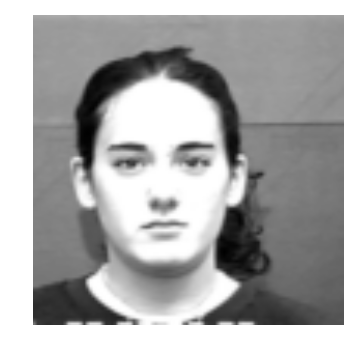

Distance :  7543.46546318


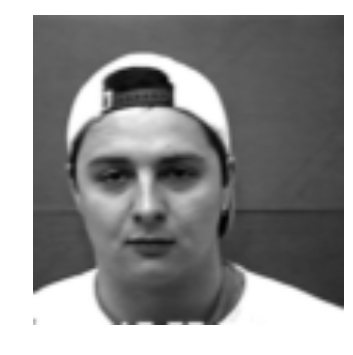

Distance :  6489.06007834


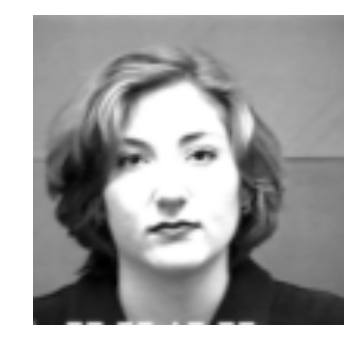

Distance :  6230.87517557


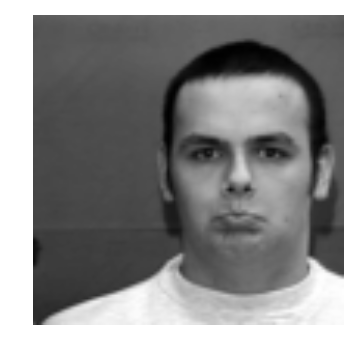

Distance :  3900.80689862


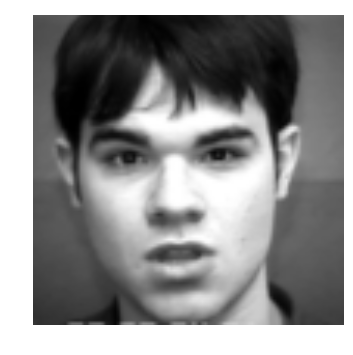

Distance :  172.90793949


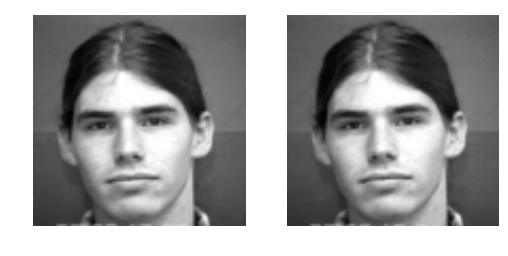

Distance :  1229.68007189


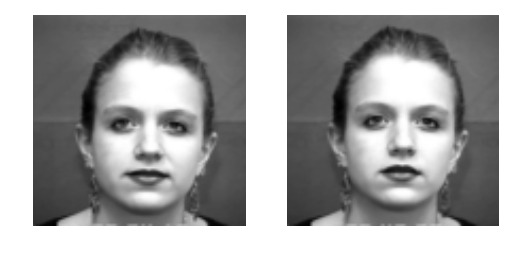

Distance :  82.6907048326


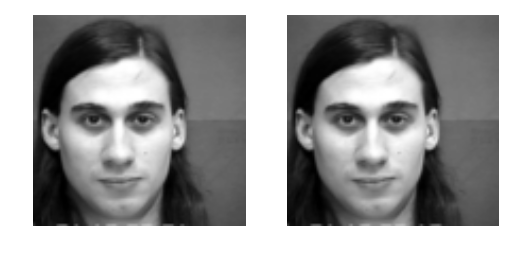

Distance :  1089.37050397


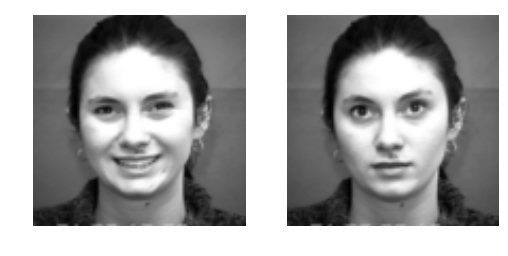

Distance :  1116.00280868


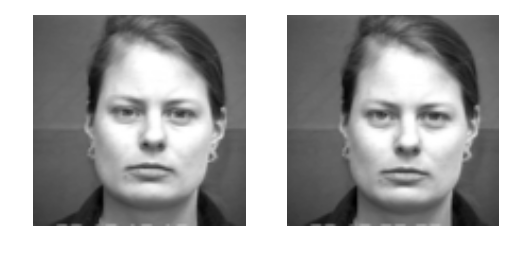

Distance :  1267.81161008


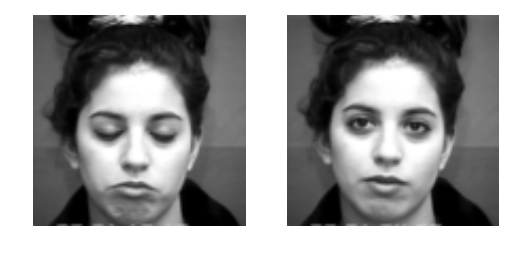

Distance :  4409.88022554


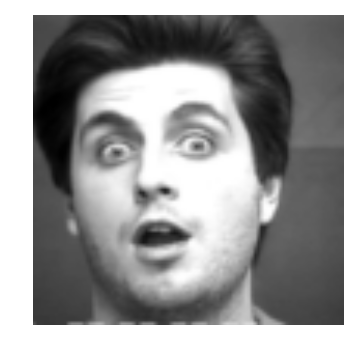

Distance :  1838.25886675


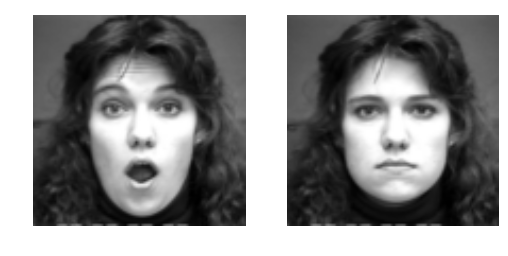

Distance :  2890.88017196


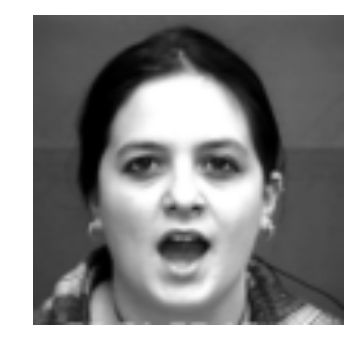

Distance :  699.90917757


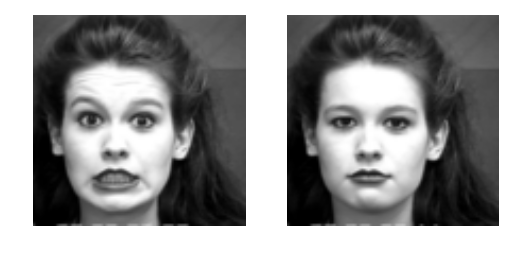

Distance :  1199.0178193


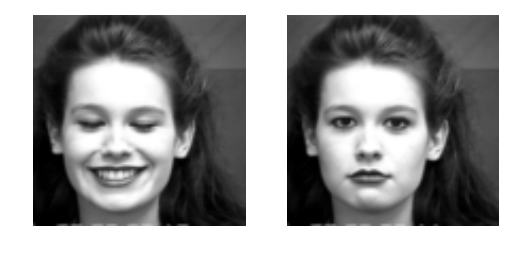

Distance :  2421.82841294


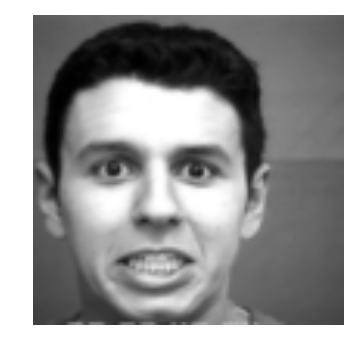

Distance :  1646.73594767


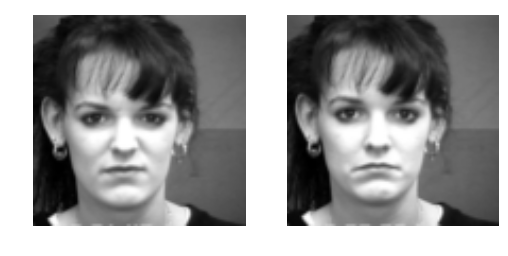

Distance :  1331.20377594


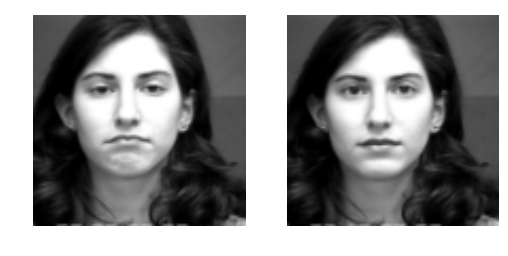

Distance :  708.447917297


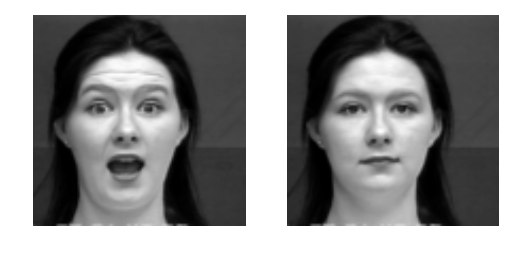

Distance :  1382.74880667


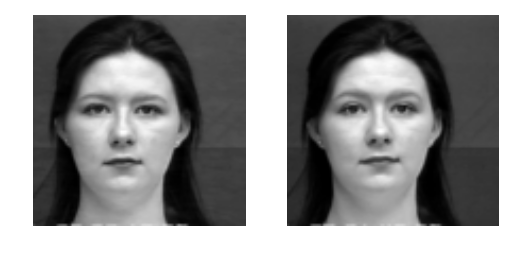

Distance :  6712.66295458


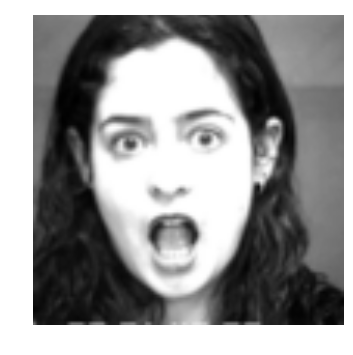

Distance :  5382.79187622


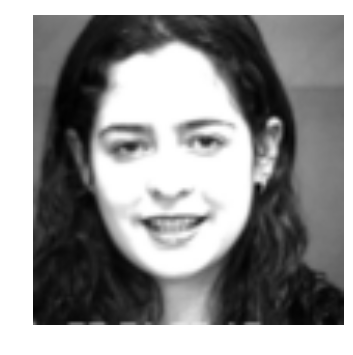

Distance :  4894.2253906


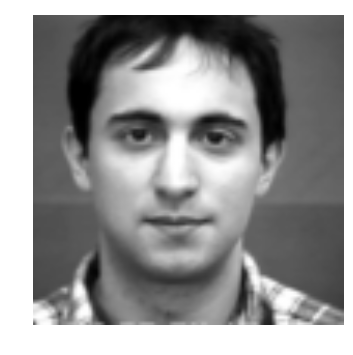

Distance :  6216.29593255


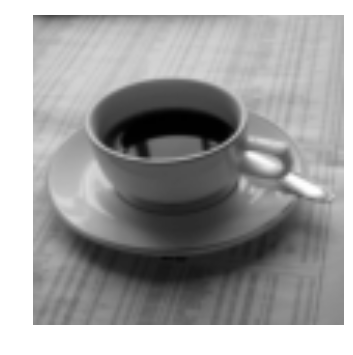

Distance :  7341.9751896


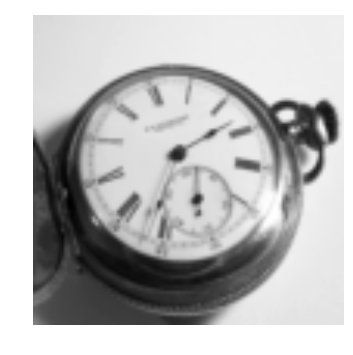

Distance :  6262.32393164


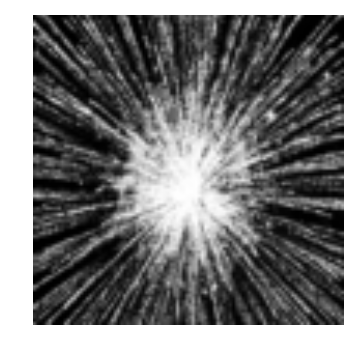

Distance :  6567.04969805


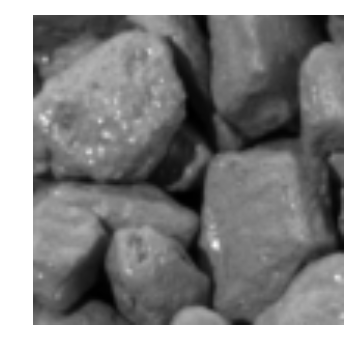

Distance :  7282.23217187


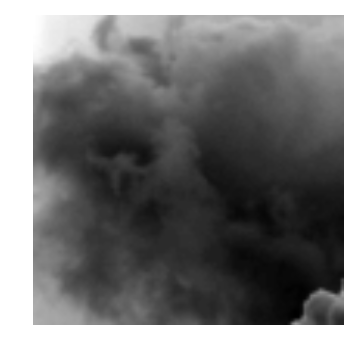

Distance :  7004.93352738


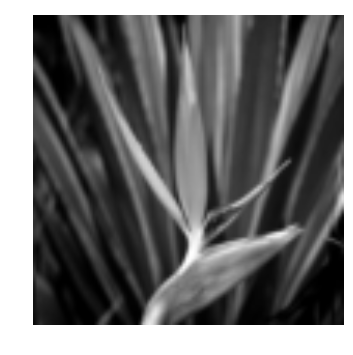

Distance :  4939.62060503


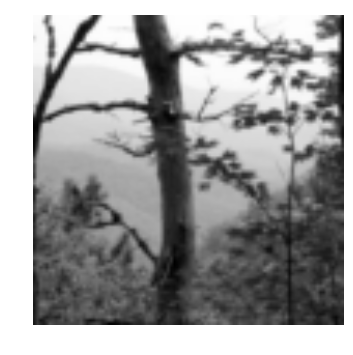

In [49]:
#Task 3
print('Task 3 is in progress : Face Recongnition has Started for Testing Images K=15')
total_k_test_images = classify_images(dictionary_eigen_vector,
                                                               test_zero_mean_image_matrix,
                                                               original_image_100,
                                                               test_image_100,
                                                               training_names,
                                                               testing_names)

display_test_images(total_k_test_images,False,th)

# Just for Testing K=24 to see the Face Recustruction

Task 2 is in progress : Reconstruction of Original Image Has for K=24


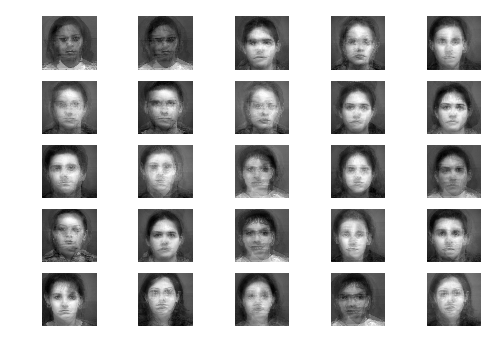

In [50]:
#Task 2
print('Task 2 is in progress : Reconstruction of Original Image Has for K=24')
#Eigen_values, Eigen_vectors
eigen_vector_dict = prepare_dictionary_Eigen_value_vector(Eigen_values, Eigen_vectors)
eigen_vector_dict.sort(key=operator.itemgetter('EValue'), reverse=True)

number_of_eigen_vector = [24]
dictionary_eigen_vector = reconstruct_image(number_of_eigen_vector,
                                                                     eigen_vector_dict,
                                                                     zero_mean_image_matrix,
                                                                     image_size,
                                                                     True,
                                                                     mean_vector_of_data_matrix)

Task 4 is in progress : Calculating Error for Each K


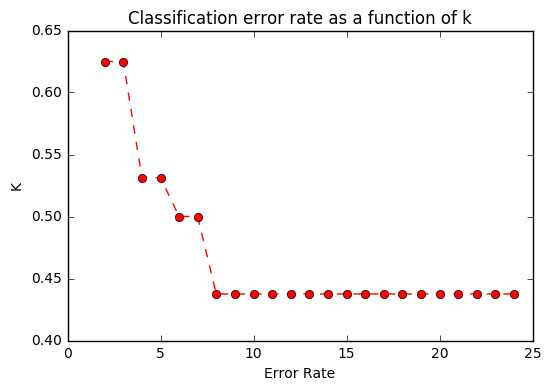

In [51]:
#Task 4
print('Task 4 is in progress : Calculating Error for Each K')
number_of_images_seq_eigen_vector = np.linspace(2,number_of_training_image-1,number_of_training_image-2,dtype=int)

dictionary_eigen_vector_error_rate_calc = reconstruct_image(number_of_images_seq_eigen_vector,
                                                                                     eigen_vector_dict,
                                                                                     zero_mean_image_matrix,
                                                                                     image_size,
                                                                                     False,
                                                                                     mean_vector_of_data_matrix)

total_k_test_images = classify_images(dictionary_eigen_vector_error_rate_calc,
                                                               test_zero_mean_image_matrix,
                                                               original_image_100,
                                                               test_image_100,
                                                               training_names,
                                                               testing_names)

error_dict,x,y = calculate_error_rate(total_k_test_images)

plot_error_vs_k(x,y)